**Machine Learning for Mutual Fund Risk Classification**

Importing Libraries



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Loading Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('Mutual_fund Data.csv')

**Tabular Analysis**

In [ ]:
#Display the first 5 rows of the dataframe to get an overview of the data
df.head()

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51%,28.32,37.79%,20.29%,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25%,24.89,46.08%,21.93%,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94%,35.11,54.46%,27.48%,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37%,21.40,59.79%,0,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06%,23.69,32.07%,15.18%,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High


In [ ]:
df.tail()

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk,AUM_in_cr
1388,lic mutual fund,LIC MF Multi Cap Reg-G,0,0,4.56,17.43,48.89,0.00,Rs.1000.0,Yogesh Patil,1369.6 cr,Equity,Very High,1369.60
1389,lic mutual fund,LIC MF Large Cap-G,2,3,4.85,57.66,31.34,13.48,Rs.1000.0,Yogesh Patil,1576.3 cr,Equity,Very High,1576.30
1390,lic mutual fund,LIC MF Large & Mid Cap Reg-G,2,2,4.98,40.39,48.16,19.01,Rs.1000.0,Yogesh Patil,3220.66 cr,Equity,High,3220.66
1391,lic mutual fund,LIC MF Infrastructure-G,3,4,2.92,51.91,76.07,33.55,Rs.1000.0,Yogesh Patil,725.1 cr,Equity,Very High,725.10
1392,lic mutual fund,LIC MF Balanced Advantage Reg-G,0,0,2.64,13.28,16.75,0.00,Rs.1000.0,Yogesh Patil,872.09 cr,Hybrid,Moderately High,872.09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMC                    1393 non-null   object 
 1   Fund Name              1393 non-null   object 
 2   Morning star rating    1393 non-null   int64  
 3   Value Research rating  1393 non-null   int64  
 4   1 month return         1393 non-null   float64
 5   NAV                    1393 non-null   float64
 6   1 Year return          1393 non-null   float64
 7   3 Year Return          1393 non-null   float64
 8   Minimum investment     1393 non-null   object 
 9   Fund Manager           1354 non-null   object 
 10  AUM                    1393 non-null   object 
 11  Category               1393 non-null   object 
 12  Risk                   1393 non-null   object 
 13  AUM_in_cr              1393 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 152.5+ 

In [ ]:
# --- 1. Data Cleaning & Pre-processing ---
# The 'AUM' column has 'cr' and 'lakh'. We need to convert this to a single numerical value (in crores).
df['AUM_in_cr'] = df['AUM'].astype(str).str.lower()
df['AUM_in_cr'] = df['AUM_in_cr'].str.replace(' cr', '').str.replace(',', '')
df['AUM_in_cr'] = df['AUM_in_cr'].str.replace('lakh', '0.01').str.replace('k', '')
df['AUM_in_cr'] = pd.to_numeric(df['AUM_in_cr'], errors='coerce')
df['AUM_in_cr'] = df['AUM_in_cr'].fillna(0)

In [ ]:
# The return columns are percentages and have non-numeric characters.
return_cols = ['1 month return', '1 Year return', '3 Year Return']
for col in return_cols:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(0)

In [ ]:
# The 'Fund Name', 'Fund Manager' and other text columns have extra spaces. Let's strip them.
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [ ]:
# Generate descriptive statistics of the numerical columns
print(" Descriptive Statistics")
print(df.describe())

 Descriptive Statistics
       Morning star rating  Value Research rating  1 month return  \
count          1393.000000            1393.000000     1393.000000   
mean              1.666906               1.669060        3.320919   
std               1.792674               1.730066        2.703861   
min               0.000000               0.000000        0.000000   
25%               0.000000               0.000000        0.690000   
50%               1.000000               1.000000        3.100000   
75%               3.000000               3.000000        5.410000   
max               5.000000               5.000000       12.490000   

               NAV  1 Year return  3 Year Return     AUM_in_cr  
count  1393.000000    1393.000000    1393.000000   1393.000000  
mean    321.144436      21.953597       8.711450   4703.085363  
std     856.937370      18.815253       8.758146   9632.457662  
min       0.000000       0.000000       0.000000      0.000000  
25%      15.260000       7.29

In [ ]:
print("Mean, Median, Min, Max for Numerical Columns")
for col in ['1 month return', '1 Year return', '3 Year Return', 'NAV', 'AUM_in_cr']:
    print(f" {col} ")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")


Mean, Median, Min, Max for Numerical Columns
 1 month return 
Mean: 3.32
Median: 3.10
Min: 0.00
Max: 12.49
 1 Year return 
Mean: 21.95
Median: 14.49
Min: 0.00
Max: 86.35
 3 Year Return 
Mean: 8.71
Median: 5.82
Min: 0.00
Max: 39.47
 NAV 
Mean: 321.14
Median: 28.89
Min: 0.00
Max: 6706.89
 AUM_in_cr 
Mean: 4703.09
Median: 1146.47
Min: 0.00
Max: 95391.46


In [ ]:
print("DataFrame Information")
df.info()

print("Descriptive Statistics")
print(df.describe())

print("Mean, Median, Min, Max for Numerical Columns")
for col in ['1 month return', '1 Year return', '3 Year Return', 'NAV', 'AUM_in_cr']:
    print(f"--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")

print("Grouped Analysis by 'Category'")
grouped_by_category = df.groupby('Category').agg({
    'NAV': ['mean', 'median', 'min', 'max'],
    '1 Year return': ['mean', 'median', 'min', 'max'],
    '3 Year Return': ['mean', 'median', 'min', 'max'],
    'AUM_in_cr': ['mean', 'sum']
})
print(grouped_by_category)

print("Grouped Analysis by 'AMC'")
grouped_by_amc = df.groupby('AMC').agg({
    '1 Year return': ['mean', 'median', 'min', 'max'],
    'AUM_in_cr': ['mean', 'sum']
})
print(grouped_by_amc)


DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMC                    1393 non-null   object 
 1   Fund Name              1393 non-null   object 
 2   Morning star rating    1393 non-null   int64  
 3   Value Research rating  1393 non-null   int64  
 4   1 month return         1393 non-null   float64
 5   NAV                    1393 non-null   float64
 6   1 Year return          1393 non-null   float64
 7   3 Year Return          1393 non-null   float64
 8   Minimum investment     1393 non-null   object 
 9   Fund Manager           1354 non-null   object 
 10  AUM                    1393 non-null   object 
 11  Category               1393 non-null   object 
 12  Risk                   1393 non-null   object 
 13  AUM_in_cr              1393 non-null   float64
dtypes: float64(5), int64(2), object(7)

**Visulizations**

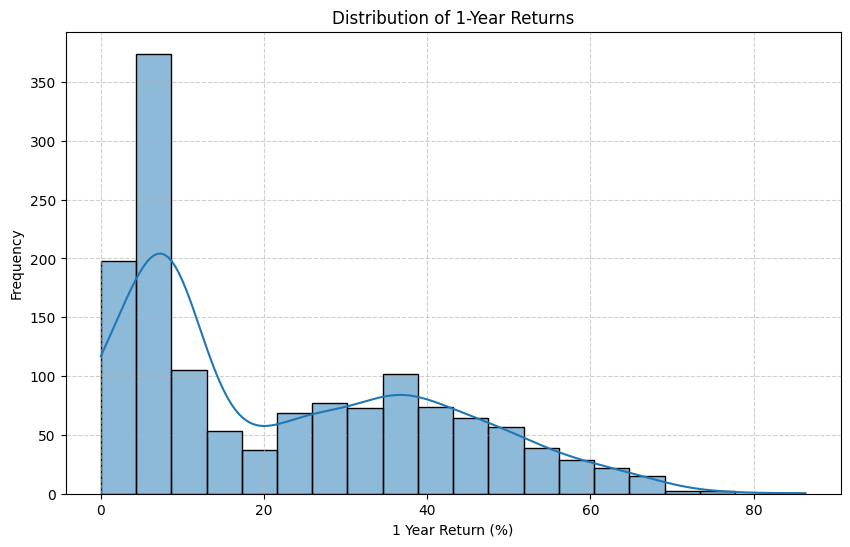

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['1 Year return'], bins=20, kde=True)
plt.title('Distribution of 1-Year Returns')
plt.xlabel('1 Year Return (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


This graph is a histogram with a KDE line that shows the distribution of 1-Year Returns of mutual funds. Most funds fall in the 0 to 10% return range, which means lower returns are more common. As the return percentage goes up, the number of funds goes down, creating a right-skewed pattern. The KDE curve smooths the data, making it easier to see the overall distribution trend. This helps us pinpoint where most funds are concentrated and how extreme values are spread out.



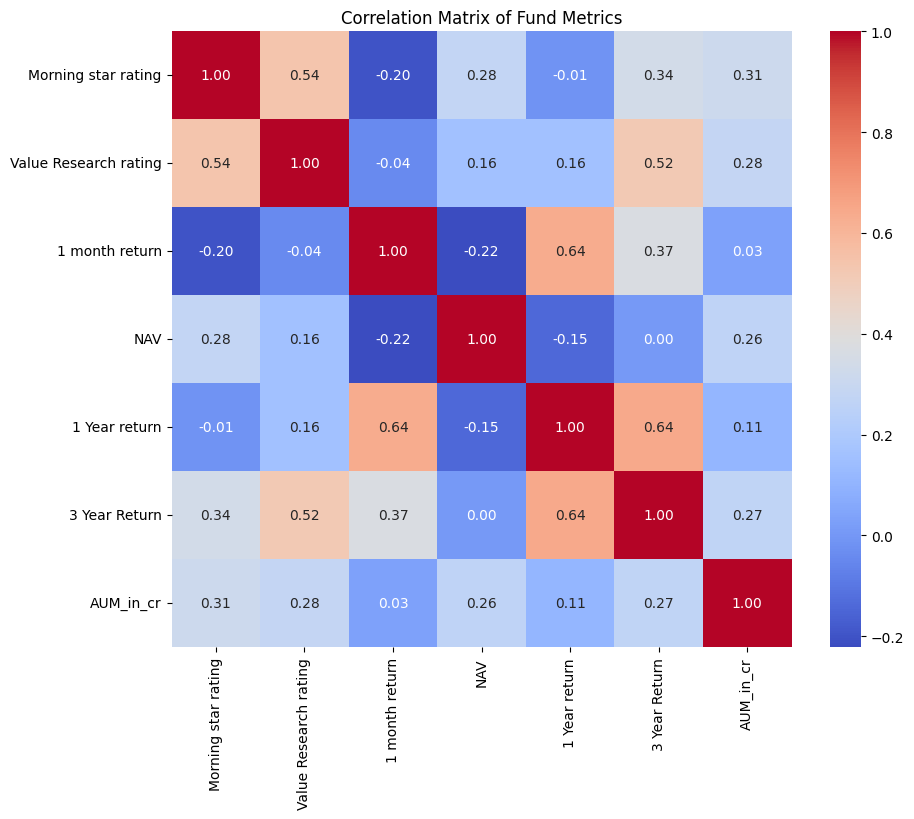

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns for correlation
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Fund Metrics')
plt.savefig('heatmap_correlation.png')
plt.show()


This heatmap shows the correlation matrix of key mutual fund metrics. There are strong positive correlations, such as between 1-Year Return and 3-Year Return (0.64). This means that funds that perform well in the short term often do well in the long term too. Similarly, the Morning Star rating and Value Research rating (0.54) are closely related, showing that both rating systems match. Negative correlations, like between 1-Month Return and NAV (-0.22), suggest opposite trends. Overall, the heatmap highlights the relationships between fund performance, ratings, and AUM.



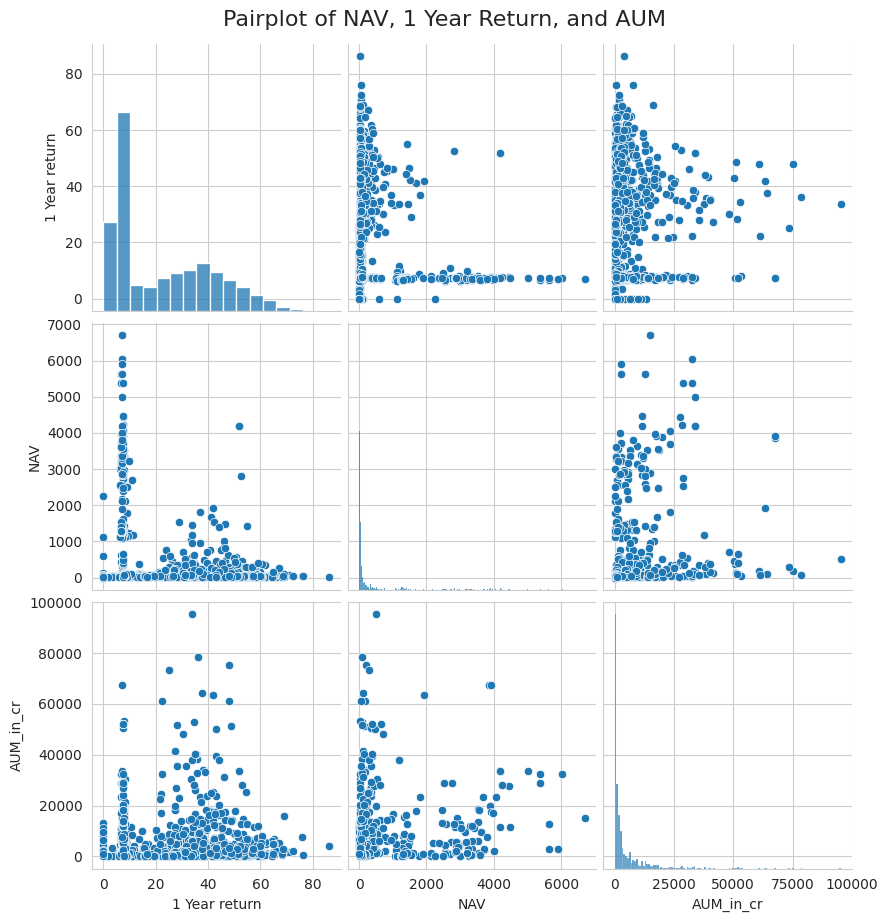

In [ ]:
sns.set_style("whitegrid")
g = sns.pairplot(df, vars=['1 Year return', 'NAV', 'AUM_in_cr'], height=3)
g.fig.suptitle('Pairplot of NAV, 1 Year Return, and AUM', y=1.02, fontsize=16)
plt.savefig('pairplot.png')
plt.show()

Based on the pair plot provided, the chart shows the relationships between three financial metrics: 1 Year Return, NAV (Net Asset Value), and AUM (Assets Under Management). The diagonal plots display the distribution of each variable through histograms. These reveal that all three metrics are heavily skewed towards lower values. The scatter plots in the off-diagonal positions depict the pairwise relationships. The plots for 1 Year Return versus NAV and 1 Year Return versus AUM show very little correlation, with data points spread widely across the graph. In contrast, there is a slight positive correlation between NAV and AUM. The plots also highlight several significant outliers across all three variables.

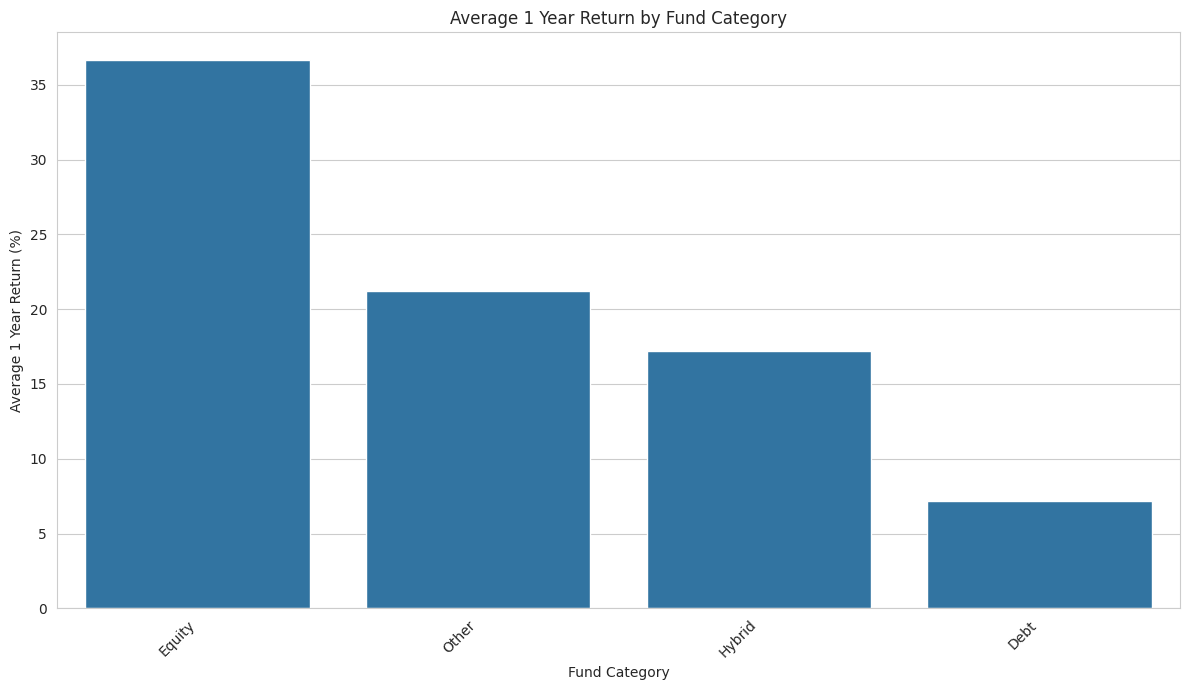

In [ ]:
# 4. Bar Chart: Average 1 Year Return by Category
avg_return_by_category = df.groupby('Category')['1 Year return'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_return_by_category.index, y=avg_return_by_category.values)
plt.title('Average 1 Year Return by Fund Category')
plt.xlabel('Fund Category')
plt.ylabel('Average 1 Year Return (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('bar_chart_avg_return_by_category.png')
plt.show()


The chart shows the Average 1 Year Return for various Fund Categories. The data indicates that Equity funds had the highest average return, surpassing 35%. Other funds had the second-highest return, followed by Hybrid funds. Finally, Debt funds had the lowest average return, at less than 10%.

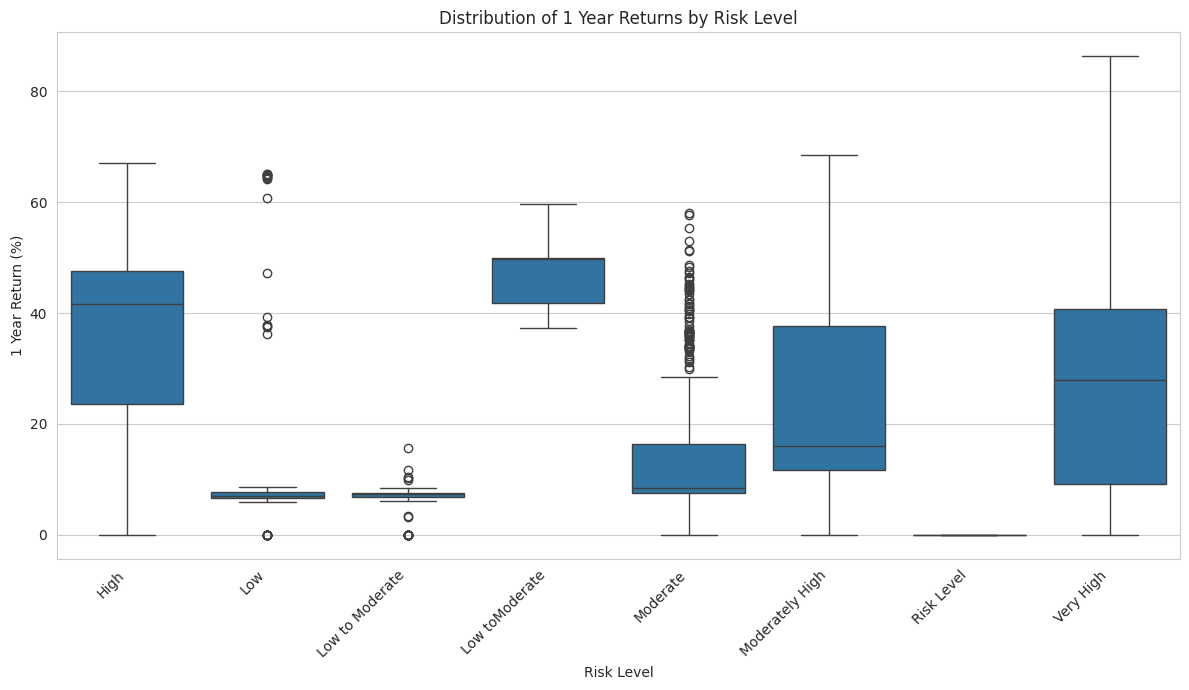

In [ ]:
# 5. Box Plot: Distribution of 1 Year Return by Risk Level
plt.figure(figsize=(12, 7))
sns.boxplot(x='Risk', y='1 Year return', data=df.sort_values(by='Risk'))
plt.title('Distribution of 1 Year Returns by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('1 Year Return (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('boxplot_return_by_risk.png')
plt.show()

Based on the box plot, the chart shows the distribution of 1 Year Returns across different Risk Levels. High-risk funds have the highest median return, followed by Low to Moderate and Very High-risk funds. The plots for Low and Low to Moderate risk funds demonstrate a narrow range of returns, indicating high stability but low potential gains. In contrast, Moderate and Very High-risk funds show a much wider range of returns, reflecting higher volatility and a broader range of possible outcomes. There are many outliers, especially in the Moderate risk category, while the "Risk Level" category has almost no returns.




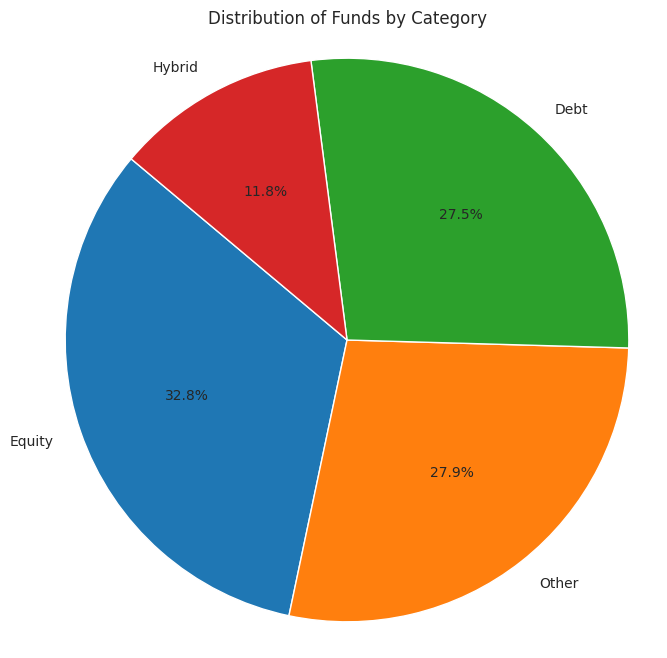

In [ ]:
# 6. Pie Chart: Distribution of Funds by Category
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Funds by Category')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_chart_category_distribution.png')
plt.show()

Based on the pie chart, the image shows the distribution of funds by category. The largest portion is in the Equity category, which makes up 32.8%. Close behind are Other and Debt funds, accounting for 27.9% and 27.5%, respectively. The smallest share, at 11.8%, is in the Hybrid category.



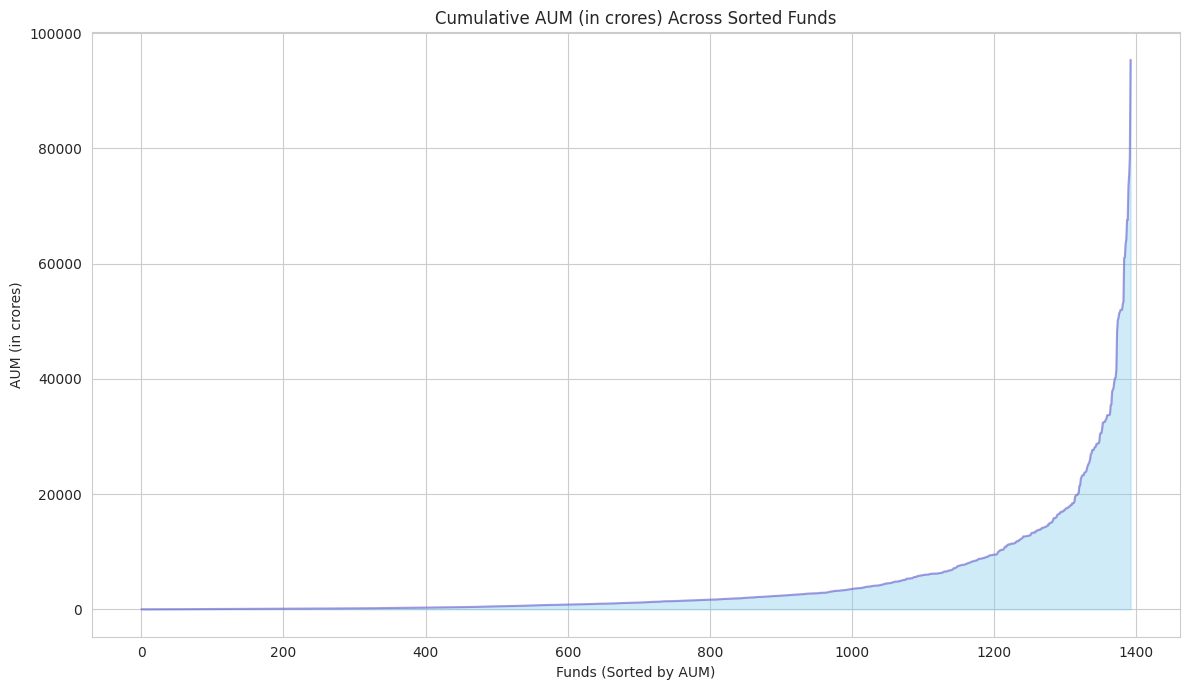

In [ ]:
# 7. Area Plot: Cumulative AUM across funds
df_sorted_by_aum = df.sort_values('AUM_in_cr', ascending=True).reset_index(drop=True)
plt.figure(figsize=(12, 7))
plt.fill_between(df_sorted_by_aum.index, df_sorted_by_aum['AUM_in_cr'], color="skyblue", alpha=0.4)
plt.plot(df_sorted_by_aum.index, df_sorted_by_aum['AUM_in_cr'], color="Slateblue", alpha=0.6)
plt.title('Cumulative AUM (in crores) Across Sorted Funds')
plt.xlabel('Funds (Sorted by AUM)')
plt.ylabel('AUM (in crores)')
plt.tight_layout()
plt.savefig('area_plot_cumulative_aum.png')
plt.show()

Based on the line chart, the graph shows the cumulative AUM (in crores) across sorted funds. The chart displays the cumulative distribution of AUM for many funds, with the funds listed in order of their AUM from low to high. The line remains almost flat for the first thousand funds, indicating that most of them have very low AUM. The curve rises sharply at the end, showing that a small number of funds hold a large portion of the total AUM. This highlights a skewed distribution where a few large funds dominate the market.



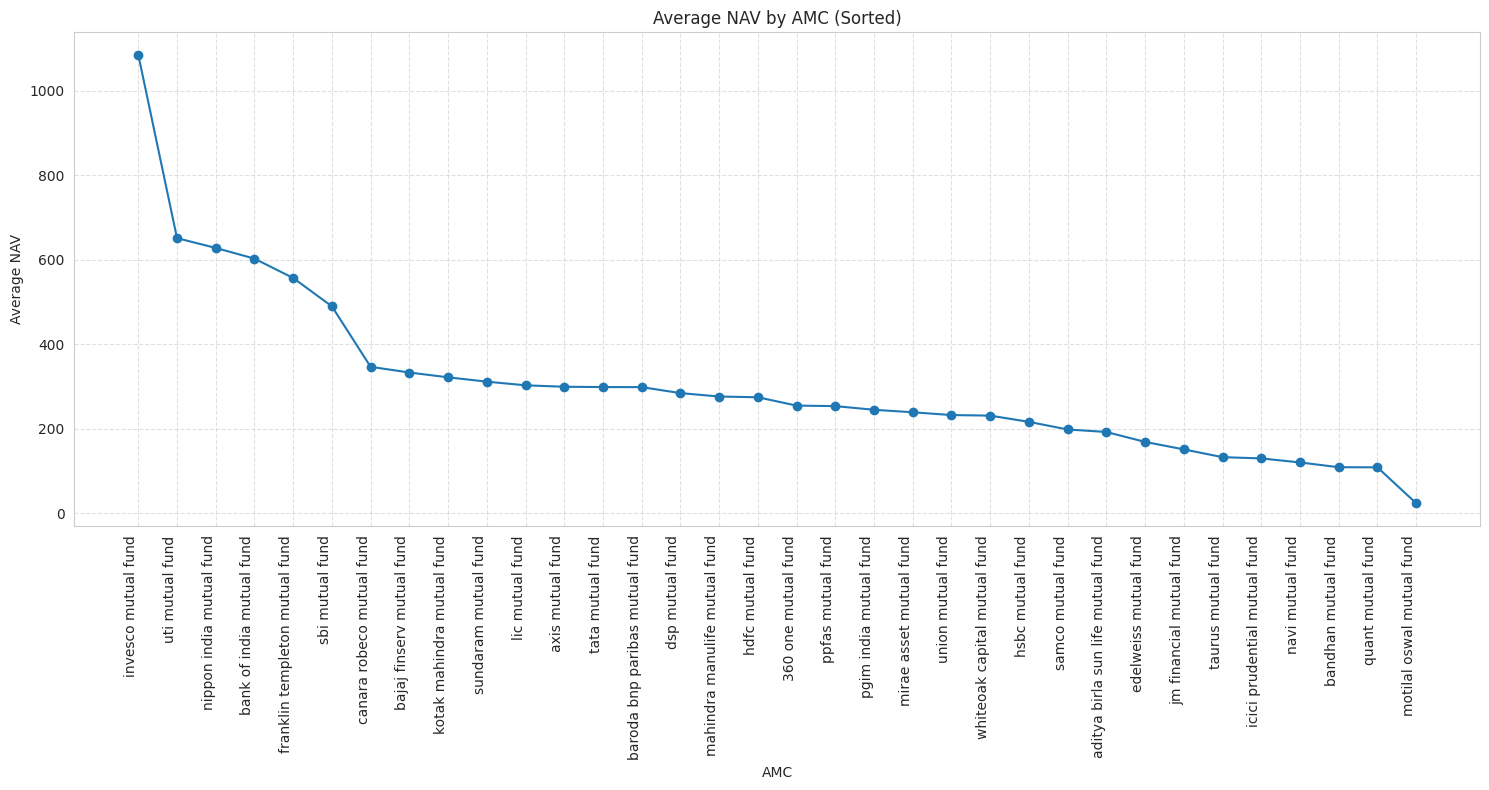

In [ ]:
# 8. Line Chart: Trend of Average NAV by AMC
avg_nav_by_amc = df.groupby('AMC')['NAV'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 8))
plt.plot(avg_nav_by_amc['AMC'], avg_nav_by_amc['NAV'], marker='o', linestyle='-')
plt.title('Average NAV by AMC (Sorted)')
plt.xlabel('AMC')
plt.ylabel('Average NAV')
plt.xticks(rotation=90, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('line_chart_avg_nav_by_amc.png')
plt.show()

Based on the line chart, the graph displays the Average NAV (Net Asset Value) for various AMCs (Asset Management Companies), sorted in descending order. The data reveals a significant difference in average NAVs among the AMCs. Invesco Mutual Fund has the highest average NAV, surpassing 1000. It is followed by UTI Mutual Fund and Nippon India Mutual Fund. After this point, the average NAV drops sharply and continues to decline gradually for the remaining AMCs, with Motilal Oswal Mutual Fund reporting the lowest average NAV

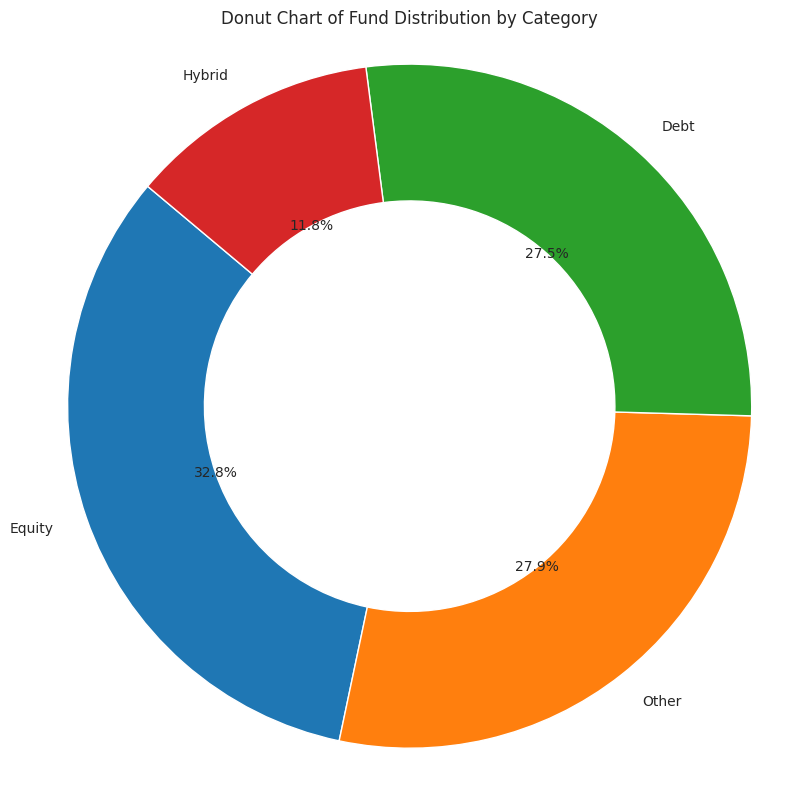

In [ ]:
#Donut Chart
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Donut Chart of Fund Distribution by Category')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('donut_chart_category_distribution.png')
plt.show()

Donut chart showing the distribution of funds by category. The largest portion of the funds is allocated to Equity at 32.8%, followed closely by Other at 27.9%. The remaining categories are Debt at 27.5% and Hybrid at 11.8%. The chart offers a clear visual summary of how the funds are distributed across four distinct categories.

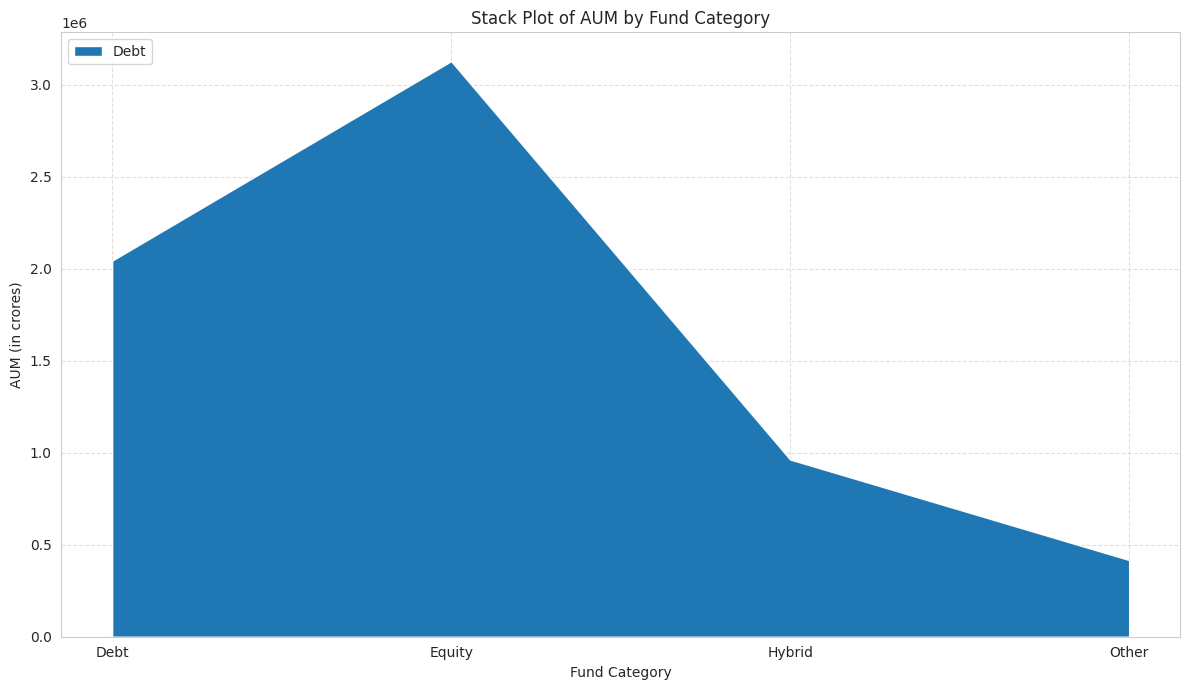

In [ ]:
df_plot = df.groupby('Category', as_index=False)['AUM_in_cr'].sum()

# Create area (stack) plot
plt.figure(figsize=(12, 7))
plt.stackplot(df_plot['Category'], df_plot['AUM_in_cr'], labels=df_plot['Category'])
plt.title('Stack Plot of AUM by Fund Category')
plt.xlabel('Fund Category')
plt.ylabel('AUM (in crores)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This chart is a stack plot titled "Stack Plot of AUM by Fund Category." It shows the Assets Under Management (AUM) in crores for various fund categories. The plot indicates that Equity has the highest AUM, exceeding 300,000 crores, followed by Debt. Hybrid and Other categories have much lower AUM, with Other being the lowest. The plot clearly compares the AUM values across different fund types.

MODEL EVALUATION

In [ ]:
# Define features and target
X = df[['Morning star rating', 'Value Research rating',
        '1 month return', '1 Year return', '3 Year Return', 'AUM_in_cr']]
y = df['Risk']   # Target column

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\nModel Performance Metrics:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")



Model Performance Metrics:
Accuracy  : 0.54
Precision : 0.50
Recall    : 0.54
F1 Score  : 0.51


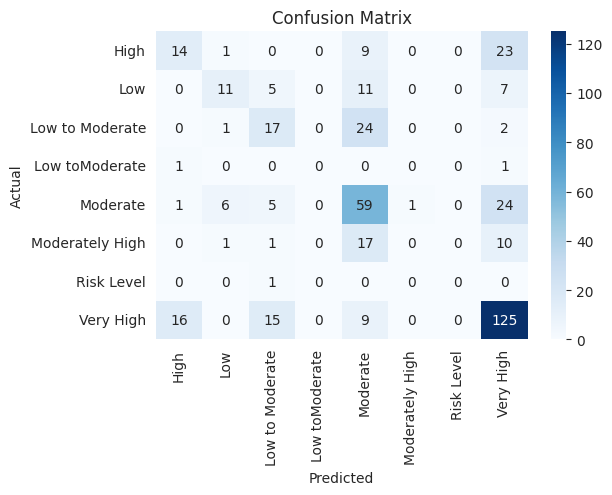

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Conclusion & Key Learnings:

The Logistic Regression model was trained and evaluated on the given Mutual Fund dataset.
The performance metrics such as Accuracy, Precision, Recall, and F1-score indicate how well the model
is able to classify the data. The confusion matrix visualization also highlights the distribution
of correct and incorrect predictions across categories.

Key Learnings:
1. Logistic Regression provides a simple yet effective baseline model.
2. Feature scaling significantly improves convergence and performance.
3. Precision and Recall values help in understanding trade-offs between false positives and false negatives.
4. F1-score gives a balanced measure of model effectiveness.
5. The confusion matrix is a useful diagnostic tool to spot class imbalances.
6. Increasing data size or applying feature engineering could further improve performance.
7. Regularization parameters in Logistic Regression can be tuned for better results.
8. Overall, this evaluation demonstrates the usefulness of ML in analyzing and predicting outcomes in mutual fund datasets.

